# Logistic Regression

## Example 1:
We have an anonymized data set of about 200 users, containing each user’s salary, her years of experience as a data scientist, and whether she paid for a premium account. As is usual with categorical variables, we represent the dependent variable as either 0 (no premium account) or 1 (premium account). Our data is in a matrix where each row is a list [experience, salary, paid_account]. Let’s turn it into the format we need:

In [3]:
tuples = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]
data = [list(row) for row in tuples]


In [4]:
x = [[1] + row[:2] for row in data] # each element is [1, experience, salary] 
y = [row[2] for row in data] # each element is paid_account

An obvious first attempt is to use `linear regression` and find the best model:

<img src="images/multiple_linear_regression2.png" alt="" style="width: 600px;"/>

In [14]:
data[0]

[0.7, 48000, 1]

In [30]:
# Plot the data

import matplotlib.pyplot as plt
%matplotlib inline

def plot_data():

    # key is if a user has premium account, value is pair (experience, salary)
    plots = { "premium" : ([], []), "standard" : ([], []) }

    # we want each language to have a different marker and color
    markers = { "premium" : "o", "standard" : "s" }
    colors  = { "premium" : "r", "standard" : "b" }
        
    for item in data:
        if item[2] == 0:
            plots["premium"][0].append(item[0])
            plots["premium"][1].append(item[1])
        else:
            plots["standard"][0].append(item[0])
            plots["standard"][1].append(item[1])
        
    plt.figure(figsize=(10,8))
    
    # create a scatter series for each user's annual salary
    for account_type, (experience, salary) in plots.items():
        plt.scatter(experience, salary, color=colors[account_type], marker=markers[account_type],
                          label=account_type, zorder=10)

    plt.legend(loc=0)          # let matplotlib choose the location
    #plt.axis([-130,-60,20,55]) # set the axes
    plt.title("Paid and Unpaid Users")
    plt.xlabel("Years of Experience")
    plt.ylabel("Annual Salary")
    plt.savefig('images/linear_regression_for_classification1.png')
    plt.show()

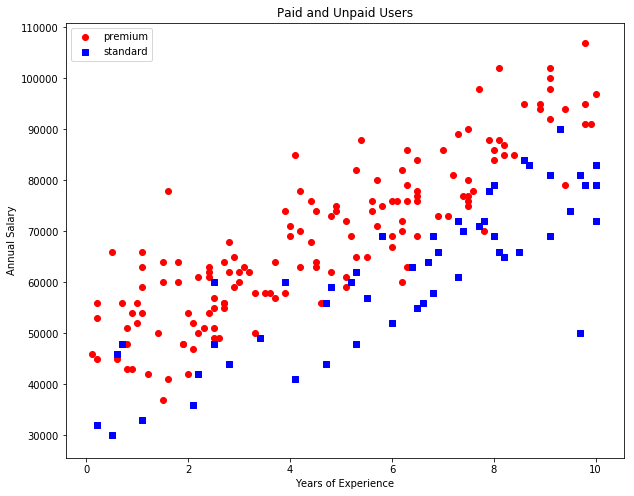

In [31]:
plot_data()

AssertionError: 

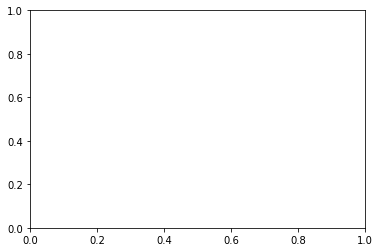

In [9]:
# Predict premium accounts using linear regression
from matplotlib import pyplot as plt
from scratch.working_with_data import rescale
from scratch.multiple_regression import least_squares_fit, predict
from scratch.gradient_descent import gradient_step

learning_rate = 0.001
rescaled_xs = rescale(xs)
beta = least_squares_fit(rescaled_xs, ys, learning_rate, 1000, 1)
# [0.26, 0.43, -0.43]
predictions = [predict(x_i, beta) for x_i in rescaled_xs]

plt.scatter(predictions, ys)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.savefig('images/linear_regression_for_classification2.png')
plt.show();